In [96]:
from string import ascii_letters
import scipy.io as sio
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

## plot the QC-FC distance correlation density scatter plot

In [97]:
# load the qcfc for each edges and the distance for each edges
qcfc_gsr = np.loadtxt('/data/fcqc/gsr_01608/qcfc.txt')
distance = np.loadtxt('/data/fcqc/gsr_01608/distanceMatrix.txt')
qcfc_nogsr = np.loadtxt('/data/fcqc/nogsr_01608/qcfc.txt')

# Normalize the qcfc and distance for plotting
normed_qcfc_gsr = (qcfc_gsr - np.mean(qcfc_gsr)) / (np.std(qcfc_gsr))
norm_distance = (distance - np.mean(distance)) / (np.std(distance))
normed_qcfc_nogsr = (qcfc_nogsr - np.mean(qcfc_nogsr)) / (np.std(qcfc_nogsr))

### Plot the QC-FC distribution with GSR and without GSR

/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


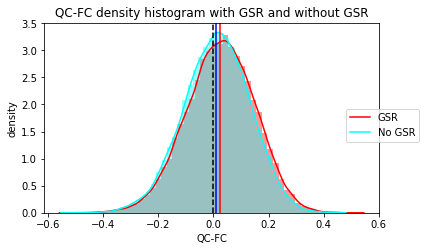

In [99]:
fig = plt.figure(figsize=(6,3.5))

p1=sns.distplot( qcfc_gsr , color="red", label="GSR")
p1=sns.distplot( qcfc_nogsr , color="cyan", label="No GSR")

p1.set(xlabel= 'QC-FC',ylabel = 'density', title = 'QC-FC density histogram with GSR and without GSR')
p1.axvline(0,0,3.5, color='black', linestyle='--')
p1.axvline(np.mean(qcfc_gsr),0,3.5, color='red')
p1.axvline(np.mean(qcfc_nogsr),0,3.5, color='blue')
fig.legend(loc='center right',labels=['GSR','No GSR'])

### Plot the scatter plot of QC-FC and distance and the correlation line between the two variables

0.13922682499892816
-3.373275687457144e-18


/home/jasongong/anaconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/jasongong/anaconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


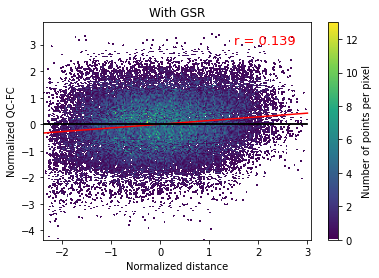

In [100]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, norm_distance, normed_qcfc_gsr)


#sns.plt.show()
correlation = scipy.stats.linregress(norm_distance, normed_qcfc_gsr)
X_plot = np.linspace(-2.5,3,1000)
print(correlation.rvalue)
print(correlation.intercept)
plt.plot(X_plot, X_plot*correlation.rvalue + correlation.intercept, 'red')
plt.plot(X_plot, X_plot*0, 'black')
plt.plot(X_plot, X_plot*0, 'black')
plt.annotate('r = 0.139', (1.5, 3), color='red', size=13)
plt.xlabel('Normalized distance')
plt.ylabel('Normalized QC-FC')
plt.title('With GSR')
plt.show()

0.16853471518543292
6.704976592757593e-19


/home/jasongong/anaconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/jasongong/anaconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


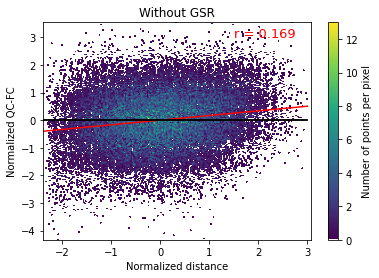

In [101]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, norm_distance, normed_qcfc_nogsr)


#sns.plt.show()
correlation = scipy.stats.linregress(norm_distance, normed_qcfc_nogsr)
X_plot = np.linspace(-2.5,3,1000)
print(correlation.rvalue)
print(correlation.intercept)
plt.plot(X_plot, X_plot*correlation.rvalue + correlation.intercept, 'red')
plt.plot(X_plot, X_plot*0, 'black')
plt.plot(X_plot, X_plot*0, 'black')
plt.annotate('r = 0.169', (1.5, 3), color='red', size=13)
plt.xlabel('Normalized distance')
plt.ylabel('Normalized QC-FC')
plt.title('Without GSR')
plt.show()

## Plot the weighted/binary adjacency matrix for the brain network

In [102]:
# Load the weighted adjacency matrix and the binary adjacency matrix
flow_win2_weight = np.loadtxt('/data/weight/flow/flow_win2.txt',
                              delimiter=',')
flow_win2_binary = np.loadtxt('/data/binary/flow/flow_win2.txt',
                              delimiter=',')

# Load the module assignment after the community detection algorithms
modules = sio.loadmat('/data/figures/python/modules.mat')
modules = modules['modules']

# Load the labels for each node
label = np.loadtxt('/data/figures/labels.txt',dtype='str')
label = pd.Series(label)

# Convert the matrix to pandas dataframe for plotting
flow_win2_weight = pd.DataFrame(data=flow_win2_weight, index=label, columns=label)
flow_win2_binary = pd.DataFrame(data=flow_win2_binary, index=label, columns=label)

In [103]:
#Set the color for the grouped nodes, in the plot, each nodes will be colored based on its node label
label_list = list(set(label))
label_list.sort()
label_list
label_color = ['#ff00ff', '#800080', '#ff0000', '#00ff00', '#ffff00', '#808080','#afeeee',
              '#b43c00', '#000000', '#00ffff', '#ff8000', '#008080', '#0000ff', '#ffffff']
label_color_dict = dict(zip(label_list, label_color))
network_label_color = label.map(label_color_dict)

### Weighted Adjacency matrix

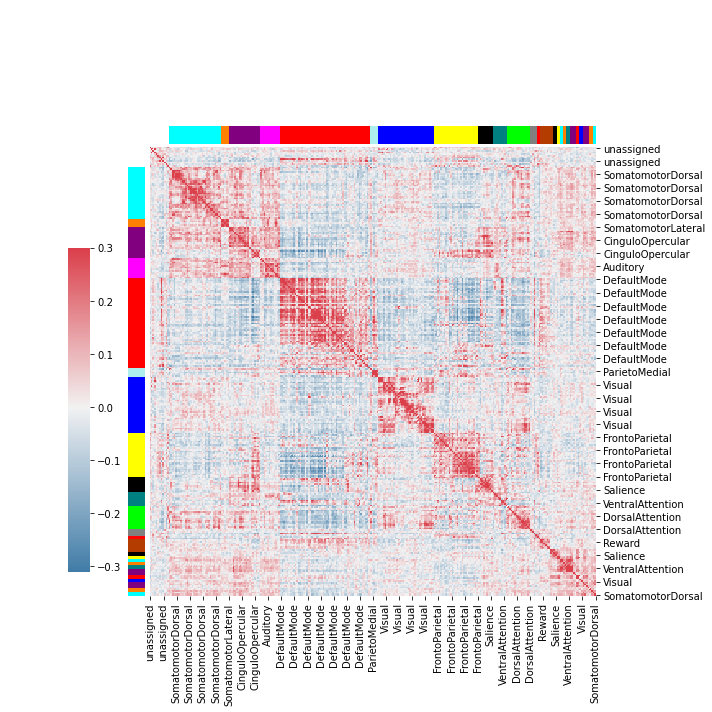

In [104]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.clustermap(flow_win2_weight, cmap=cmap, vmax=0.3, center=0,
               # Turn off the clustering
               row_cluster=False, col_cluster=False,
               # Add colored class labels
               row_colors=list(network_label_color),
               col_colors=list(network_label_color)
               # Turn off the x-label and y-label
               #xticklabels=False, yticklabels=False
                  )

for label in label_list:
    g.ax_col_dendrogram.bar(0, 0, color=label_color_dict[label],
                            label=label, linewidth=0)
#g.ax_col_dendrogram.legend(loc="lower center", ncol=5)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([.1, .2, .03, .45])
# g.fig.suptitle('Weighted adjacency correlation matrix for the functional brain network')

### Binary adjacency matrix

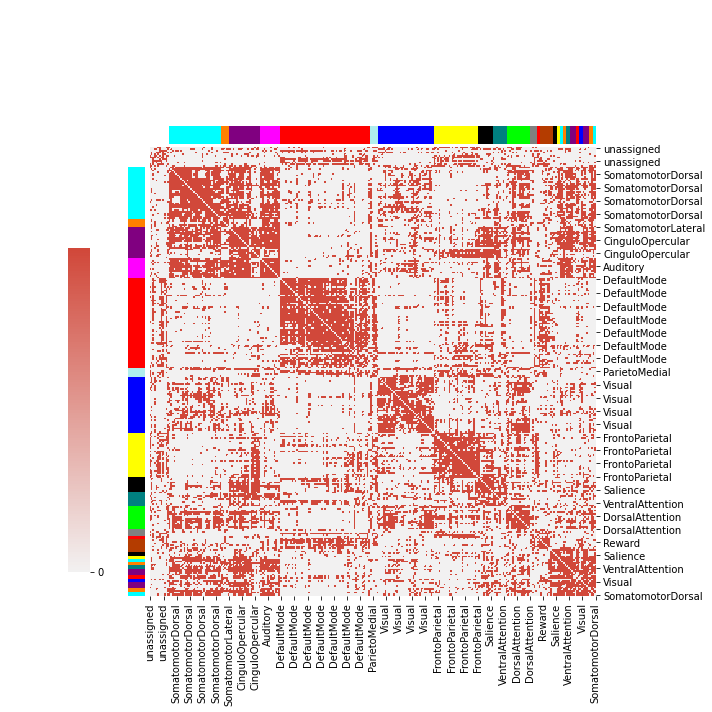

In [105]:
# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap

cmap = sns.diverging_palette(0, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.clustermap(flow_win2_binary, cmap=cmap, vmax=0.3, center=0,
               # Turn off the clustering
               row_cluster=False, col_cluster=False,
               # Add colored class labels
               row_colors=list(network_label_color),
               col_colors=list(network_label_color),
                   cbar_kws=dict(ticks=[0,1])
               # Turn off the x-label and y-label
               #xticklabels=False, yticklabels=False
                  )

for label in label_list:
    g.ax_col_dendrogram.bar(0, 0, color=label_color_dict[label],
                            label=label, linewidth=0)
#g.ax_col_dendrogram.legend(loc="lower center", ncol=5)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([.1, .2, .03, .45])
# g.fig.suptitle('Weighted adjacency correlation matrix for the functional brain network')

## Plot the community assignment

In [ ]:
# Convert the community assignments to pandas dataframe
print(modules.shape)
module_flow_opt1 = modules[2,2,:,:]
module_flow_opt1 = pd.DataFrame(data=module_flow_opt1, index=label, 
                       columns=['win_1', 'win_2', 'win_3', 'win_4'])
module_flow_opt1 = module_flow_opt1.astype('int32')

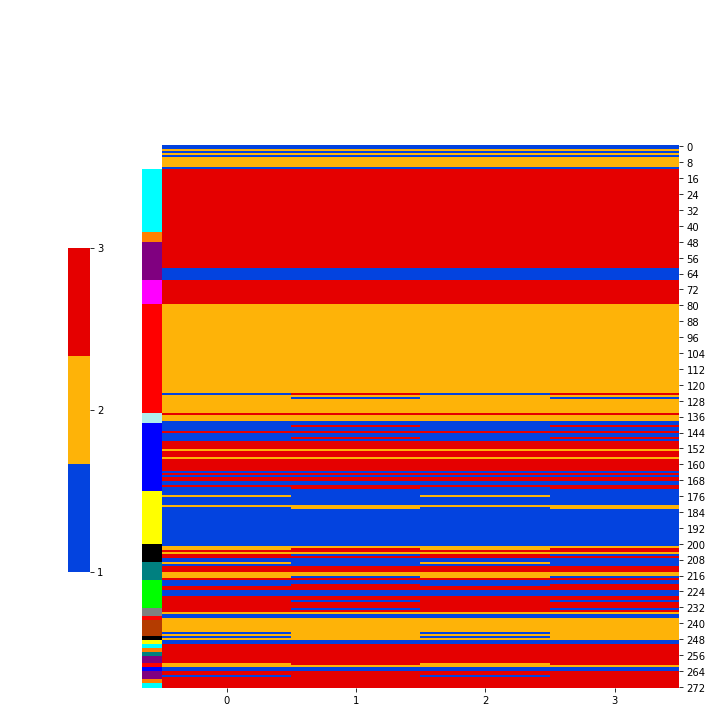

In [108]:


cmap = sns.xkcd_palette(["blue", "amber", "red"])

# Draw the heatmap with the mask and correct aspect ratio
g = sns.clustermap(module_flow_opt1, cmap=cmap, 
               # Turn off the clustering
               row_cluster=False, col_cluster=False,
               # Add colored class labels
               row_colors=list(network_label_color),cbar_kws=dict(ticks=[1, 2, 3, 4])
               # Turn off the x-label and y-label
               #xticklabels=False, yticklabels=False
                  )

for label in label_list:
    g.ax_col_dendrogram.bar(0, 0, color=label_color_dict[label],
                            label=label, linewidth=0)
#g.ax_col_dendrogram.legend(loc="lower center", ncol=5)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([.1, .2, .03, .45])

## Plot the metastability and synchrony

In [109]:
# Load the meta and sync data from csv file
meta_data = pd.read_csv("/data/figures/meta_sync/meta.csv")
sub_list = meta_data['Unnamed: 0']
meta_data = meta_data.drop('Unnamed: 0', 1)
sync_data = pd.read_csv("/data/figures/meta_sync/sync.csv")
sync_data = sync_data.drop('Unnamed: 0', 1)

In [116]:
# Data conversion to a easy-to-plot format
sync_data_df = {'sub' : sub_list.loc[sub_list.index.repeat(4*3)].tolist(),
                  'brain_region' : list(np.repeat(['global', 'fpcn', 'reward', 'fpcn&reward'],(3))) * 35,
                  'condition' : ['bore', 'flow', 'frus'] * (4*35),
                  'synchrony' : list(sync_data.stack())
                 }
sync_data_df = pd.DataFrame(sync_data_df)

meta_data_df = {'sub' : sub_list.loc[sub_list.index.repeat(4*3)].tolist(),
                  'brain_region' : list(np.repeat(['global', 'fpcn', 'reward', 'fpcn&reward'],(3))) * 35,
                  'condition' : ['bore', 'flow', 'frus'] * (4*35),
                  'metastability' : list(meta_data.stack())
                 }
meta_data_df = pd.DataFrame(meta_data_df)

In [114]:
# Save the formatted file to csv file
meta_data_df.to_csv('/data/meta_formated.csv', index=False)
sync_data_df.to_csv('/data/sync_formated.csv', index=False)